# **Description**


For the CXPT501 final project, you will explore a large dataset that we simulated and modified based on a clinical trial (PIONEER-HF, ClinicalTrials.gov Identifier: NCT02554890).

In this study, researchers compared the effects of sacubitril/valsartan versus enalapril in stabilized acute heart failure patients with reduced ejection fraction.



##*Information included in the dataset*:

*Demographics*
*   Age
*   Sex
*   Race
*   Ethnicity

*Baseline characteristics*
*   Height (cm)
*   Weight (kg)
*   Smoking history
*   Pre-treatment NT-proBNP (pg/mL)
*   Pre-treatment BNP (pg/mL)

*Disease characteristics*
*   Prior use of ACEi/ARB
*   Left ventricular ejection fraction (%)
*   Chronic renal insufficiency

*Intervention*
*   Sacubitril/valsartan
*   Enalapril

*Efficacy outcome*
*   Week 4 NT-proBNP (pg/mL)
*   Week 8 NT-proBNP (pg/mL)

*Safety outcome*
*   Symptomatic hypotension
*   Hyperkalemia
*   Angioedema
*   Death

# **Instructions**

## **Data import (6 points)**

**Import the Python libraries you decide to use here, e.g. Pandas (2 points)**

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

**Download/load your individual dataset (.csv file) (2 points)**

We have prepared a dataset for each of you, labeled by name. Please download or directly import your corresponding data file from https://github.com/Mangul-Lab-USC/CXPT-501-Fall_23. Each dataset contains data for 1 million patients, one per row.

For directly importing your file from GitHub to your Colab notebook, click on your assigned file then right-click the Download button. From there, a drop-down menu like below should appear. Select the option that copies the direct link address to your clipboard, then paste it into your notebook.

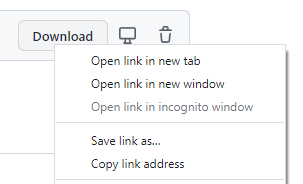

**The drop-down menu shown in Google Chrome.** If you use this web browser, click "Copy link address".

**Display the dataset (2 points)**

In [37]:
df = pd.read_csv ('https://github.com/Mangul-Lab-USC/CXPT-501-Fall_23/raw/main/Dhruv_Kantilal.csv')
df

,Age,Sex,Race,Ethnicity,Height (cm),Weight (kg),Smoking history,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Prior use of ACEi/ARB,Left ventricular ejection fraction (%),Chronic renal insufficiency,Group,Symptomatic hypotension,Hyperkalemia,Death
0,47.0,Male,Native American,Hispanic or Latino,177.0,109.0,former,6121.516,4572.772,3415.861,2002.396,No,33.867,Yes,Enalapril,No,No,No
1,79.0,Female,Pacific Islander,Hispanic or Latino,189.0,70.0,former,5653.372,4223.069,3154.633,1465.420,No,41.452,Yes,Enalapril,No,No,No
2,52.0,Male,Asian,Not Hispanic or Latino,170.0,78.0,former,6907.303,5159.755,3854.337,1850.056,No,33.508,No,Enalapril,Yes,No,No
3,64.0,Male,Asian,Hispanic or Latino,179.0,42.0,never,7303.676,5455.846,4075.517,1897.271,Yes,27.462,No,Enalapril,No,Yes,No
4,68.0,Male,Unknown,Hispanic or Latino,196.0,110.0,never,6569.322,4907.284,3665.741,1313.569,Yes,30.447,Yes,Enalapril,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,74.0,Male,Unknown,Hispanic or Latino,171.0,85.0,current,5827.914,3106.278,1655.646,1737.297,No,25.925,Yes,Sacubitril-valsartan,No,Yes,Yes
996,76.0,Female,Other,Not Hispanic or Latino,167.0,104.0,former,6904.870,3680.296,1961.598,1423.323,Yes,29.516,No,Sacubitril-valsartan,No,No,No
997,23.0,Male,Other,Hispanic or Latino,163.0,41.0,former,5827.777,3106.205,1655.607,1350.019,No,29.855,Yes,Sacubitril-valsartan,No,No,No
998,52.0,Female,Other,Hispanic or Latino,185.0,67.0,current,5942.064,3167.120,1688.075,1596.844,Yes,35.143,Yes,Sacubitril-valsartan,Yes,Yes,No


## **Data cleaning (16 points)**


**Please remove all rows that have any NaN value in them (2 points)**

You can confirm that you've done this properly by using:
```
DataFrame.isnull().sum()
```

In [38]:
df_cleaned = df.dropna()
print(df_cleaned)

      Age     Sex              Race               Ethnicity  Height (cm)  \
0    47.0    Male   Native American      Hispanic or Latino        177.0   
1    79.0  Female  Pacific Islander      Hispanic or Latino        189.0   
2    52.0    Male             Asian  Not Hispanic or Latino        170.0   
3    64.0    Male             Asian      Hispanic or Latino        179.0   
4    68.0    Male           Unknown      Hispanic or Latino        196.0   
..    ...     ...               ...                     ...          ...   
995  74.0    Male           Unknown      Hispanic or Latino        171.0   
996  76.0  Female             Other  Not Hispanic or Latino        167.0   
997  23.0    Male             Other      Hispanic or Latino        163.0   
998  52.0  Female             Other      Hispanic or Latino        185.0   
999  17.0  Female   Native American      Hispanic or Latino        192.0   

     Weight (kg) Smoking history  Pre-treatment NT-proBNP (pg/mL)  \
0          109.0  

In [39]:
df_cleaned.isnull().sum()

Age                                       0
Sex                                       0
Race                                      0
Ethnicity                                 0
Height (cm)                               0
Weight (kg)                               0
Smoking history                           0
Pre-treatment NT-proBNP (pg/mL)           0
Week 4 NT-proBNP (pg/mL)                  0
Week 8 NT-proBNP (pg/mL)                  0
Pre-treatment BNP (pg/mL)                 0
Prior use of ACEi/ARB                     0
Left ventricular ejection fraction (%)    0
Chronic renal insufficiency               0
Group                                     0
Symptomatic hypotension                   0
Hyperkalemia                              0
Death                                     0
dtype: int64

**Based on the study's inclusion criteria, please filter out patients who don't meet the following criteria. Store the remaining patient data in a new DataFrame. (8 points)**

*Inclusion criteria*
*   age >= 18
*   pre-treatment NT-proBNP >= 1600 pg/mL
*   pre-treatment BNP >= 400 pg/mL
*   left ventricular ejection fraction <= 40%

You can confirm how many patient entries remain by using:
```
len(DataFrame)
```



In [40]:
df_inclusion = df_cleaned.loc[(df_cleaned['Age'] >= 18) & (df_cleaned['Pre-treatment NT-proBNP (pg/mL)'] >= 1600) & (df_cleaned['Pre-treatment BNP (pg/mL)'] >= 400 ) & (df_cleaned['Left ventricular ejection fraction (%)'] <= 40)]
print (df_inclusion)

      Age     Sex             Race               Ethnicity  Height (cm)  \
0    47.0    Male  Native American      Hispanic or Latino        177.0   
2    52.0    Male            Asian  Not Hispanic or Latino        170.0   
3    64.0    Male            Asian      Hispanic or Latino        179.0   
4    68.0    Male          Unknown      Hispanic or Latino        196.0   
6    62.0    Male        Caucasian  Not Hispanic or Latino        212.0   
..    ...     ...              ...                     ...          ...   
994  59.0  Female        Caucasian      Hispanic or Latino        210.0   
995  74.0    Male          Unknown      Hispanic or Latino        171.0   
996  76.0  Female            Other  Not Hispanic or Latino        167.0   
997  23.0    Male            Other      Hispanic or Latino        163.0   
998  52.0  Female            Other      Hispanic or Latino        185.0   

     Weight (kg) Smoking history  Pre-treatment NT-proBNP (pg/mL)  \
0          109.0          form

In [41]:
len (df_inclusion)

865

**Add a "BMI (kg/m^2)" column to the dataframe by calculating body mass index based on weight and height provided** `BMI = weight(kg)/(height(m)**2)` **where** '`**`' **is  the exponent operator in Python. Be wary of units. (6 points)**

In [42]:
df_inclusion['Height_m'] = df_inclusion['Height (cm)'] / 100

df_inclusion['BMI (kg/m^2)'] = df_inclusion['Weight (kg)'] / (df_inclusion['Height_m'] ** 2)
print (df_inclusion)

      Age     Sex             Race               Ethnicity  Height (cm)  \
0    47.0    Male  Native American      Hispanic or Latino        177.0   
2    52.0    Male            Asian  Not Hispanic or Latino        170.0   
3    64.0    Male            Asian      Hispanic or Latino        179.0   
4    68.0    Male          Unknown      Hispanic or Latino        196.0   
6    62.0    Male        Caucasian  Not Hispanic or Latino        212.0   
..    ...     ...              ...                     ...          ...   
994  59.0  Female        Caucasian      Hispanic or Latino        210.0   
995  74.0    Male          Unknown      Hispanic or Latino        171.0   
996  76.0  Female            Other  Not Hispanic or Latino        167.0   
997  23.0    Male            Other      Hispanic or Latino        163.0   
998  52.0  Female            Other      Hispanic or Latino        185.0   

     Weight (kg) Smoking history  Pre-treatment NT-proBNP (pg/mL)  \
0          109.0          form

<ipython-input-42-21c1f27cec0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inclusion['Height_m'] = df_inclusion['Height (cm)'] / 100
<ipython-input-42-21c1f27cec0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inclusion['BMI (kg/m^2)'] = df_inclusion['Weight (kg)'] / (df_inclusion['Height_m'] ** 2)


## **Data visualization (64 points)**

###**Explore the baseline characteristics among sacubitril/valsartan and enalapril groups (14 points)**

**Categorical Data**
*   Based on your judgement, use one or more of the most appropriate plot types to visualize some aspect of the categorical data. Intervention type must be distinguished by hue.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Styles

    ・Use one of Seaborn's Plot-Contexts

    ・Despine your plot
* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.



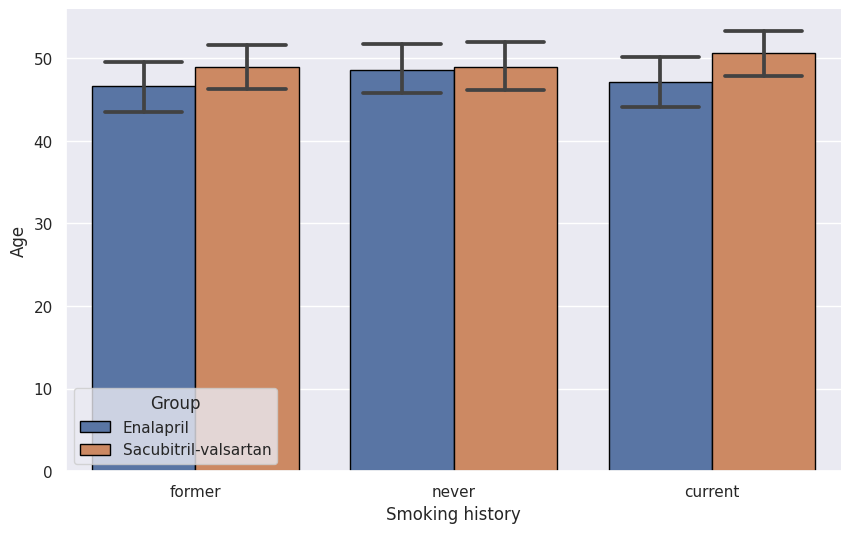

In [43]:
## Barplot of Smoking history with various age and their Intervention

sns.set(style="whitegrid")
sns.set_context("poster")
sns.set(color_codes=True)

plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_inclusion,
    x='Smoking history',
    y='Age',
    edgecolor='black',
    #facecolor=(1, 1, 1, 0),
    capsize=.3,
    hue='Group',
    dodge=True
)

sns.despine()

plt.savefig("Plot1.pdf", bbox_inches='tight')
plt.show()

###**Explore the efficacy of sacubitril/valsartan and enalapril at 4 weeks and 8 weeks (36 points)**
**Relational Data**
*   Follow the steps below to visualize NT-proBNP concentrations over time with a relational-type plot.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Styles

    ・Use one of Seaborn's Plot-Contexts

    ・Despine your plot
* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.

1) Subset the cleaned and filtered DataFrame into three smaller DataFrames containing the following columns (8 points):
*   Pre-treatment NT-proBNP & Intervention Group
*   Week 4 NT-proBNP & Intervention Group
*   Week 8 NT-proBNP & Intervention Group




In [44]:
df_pre_treatment_nt_proBNP_and_intervention_group = df_inclusion[['Pre-treatment NT-proBNP (pg/mL)', 'Group']]
df_week_4_nt_proBNP_and_intervention_group = df_inclusion[['Week 4 NT-proBNP (pg/mL)', 'Group']]
df_week_8_nt_proBNP_and_intervention_group = df_inclusion[['Week 8 NT-proBNP (pg/mL)', 'Group']]
print (df_pre_treatment_nt_proBNP_and_intervention_group)
print (df_week_4_nt_proBNP_and_intervention_group)
print (df_week_8_nt_proBNP_and_intervention_group)

     Pre-treatment NT-proBNP (pg/mL)                 Group
0                           6121.516             Enalapril
2                           6907.303             Enalapril
3                           7303.676             Enalapril
4                           6569.322             Enalapril
6                           5851.432             Enalapril
..                               ...                   ...
994                         5618.077  Sacubitril-valsartan
995                         5827.914  Sacubitril-valsartan
996                         6904.870  Sacubitril-valsartan
997                         5827.777  Sacubitril-valsartan
998                         5942.064  Sacubitril-valsartan

[865 rows x 2 columns]
     Week 4 NT-proBNP (pg/mL)                 Group
0                    4572.772             Enalapril
2                    5159.755             Enalapril
3                    5455.846             Enalapril
4                    4907.284             Enalapril
6       

2) Add a column to each of the three new DataFrames specifying each DataFrame's timepoint. The name of the column should be the same for each DataFrame (6 points).

In [45]:
df_pre_treatment_nt_proBNP_and_intervention_group['Timepoint'] = 'Pre-treatment'
df_week_4_nt_proBNP_and_intervention_group['Timepoint'] = 'Week 4'
df_week_8_nt_proBNP_and_intervention_group['Timepoint'] = 'Week 8'

<ipython-input-45-a7e7f77942cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre_treatment_nt_proBNP_and_intervention_group['Timepoint'] = 'Pre-treatment'
<ipython-input-45-a7e7f77942cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_week_4_nt_proBNP_and_intervention_group['Timepoint'] = 'Week 4'
<ipython-input-45-a7e7f77942cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

3) Merge all three of the new DataFrames via the most appropriate method. (6 points)

In [46]:
merged_df = pd.merge(df_pre_treatment_nt_proBNP_and_intervention_group, df_week_4_nt_proBNP_and_intervention_group, on=['Group', 'Timepoint'], how='outer')
merged_df = pd.merge(merged_df, df_week_8_nt_proBNP_and_intervention_group, on=['Group', 'Timepoint'], how='outer')
print (merged_df)

      Pre-treatment NT-proBNP (pg/mL)                 Group      Timepoint  \
0                            6121.516             Enalapril  Pre-treatment   
1                            6907.303             Enalapril  Pre-treatment   
2                            7303.676             Enalapril  Pre-treatment   
3                            6569.322             Enalapril  Pre-treatment   
4                            5851.432             Enalapril  Pre-treatment   
...                               ...                   ...            ...   
2590                              NaN  Sacubitril-valsartan         Week 8   
2591                              NaN  Sacubitril-valsartan         Week 8   
2592                              NaN  Sacubitril-valsartan         Week 8   
2593                              NaN  Sacubitril-valsartan         Week 8   
2594                              NaN  Sacubitril-valsartan         Week 8   

      Week 4 NT-proBNP (pg/mL)  Week 8 NT-proBNP (pg/mL)  
0   

4 ) Fill in any NaNs in the merged DataFrame with the integer value 0. (2 points)

In [47]:
merged_df = merged_df.fillna(0)
print (merged_df)

      Pre-treatment NT-proBNP (pg/mL)                 Group      Timepoint  \
0                            6121.516             Enalapril  Pre-treatment   
1                            6907.303             Enalapril  Pre-treatment   
2                            7303.676             Enalapril  Pre-treatment   
3                            6569.322             Enalapril  Pre-treatment   
4                            5851.432             Enalapril  Pre-treatment   
...                               ...                   ...            ...   
2590                            0.000  Sacubitril-valsartan         Week 8   
2591                            0.000  Sacubitril-valsartan         Week 8   
2592                            0.000  Sacubitril-valsartan         Week 8   
2593                            0.000  Sacubitril-valsartan         Week 8   
2594                            0.000  Sacubitril-valsartan         Week 8   

      Week 4 NT-proBNP (pg/mL)  Week 8 NT-proBNP (pg/mL)  
0   

5) Combine all the columns containing NT-proBNP concentration data into a new, single column. (6 points)

In [48]:
merged_df['NT-proBNP Concentration (pg/mL)'] = merged_df[['Pre-treatment NT-proBNP (pg/mL)', 'Week 4 NT-proBNP (pg/mL)', 'Week 8 NT-proBNP (pg/mL)']].max(axis=1)
print (merged_df['NT-proBNP Concentration (pg/mL)'])

0       6121.516
1       6907.303
2       7303.676
3       6569.322
4       5851.432
          ...   
2590    1596.034
2591    1655.646
2592    1961.598
2593    1655.607
2594    1688.075
Name: NT-proBNP Concentration (pg/mL), Length: 2595, dtype: float64


6) Use a line plot to graph NT-proBNP concentration over time, with Intervention Group seperated by hue. (8 points)

The arguements you pass to lineplot() should include:
*   `ci='sd'`
*   `err_style='bars'`
*   `marker="o"`



<ipython-input-49-40a6f0c53479>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


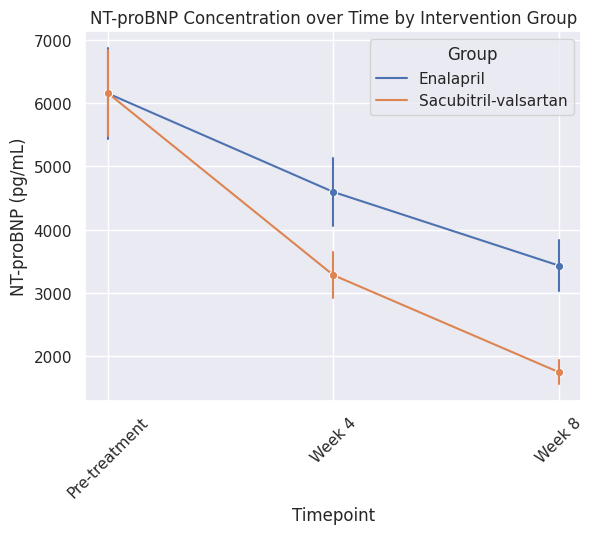

In [49]:
sns.lineplot(
    x='Timepoint',
    y='NT-proBNP Concentration (pg/mL)',
    hue='Group',
    ci='sd',
    err_style='bars',
    marker='o',
    data=merged_df
)

plt.xticks(rotation=45)
plt.xlabel('Timepoint')
plt.ylabel('NT-proBNP (pg/mL)')
plt.title('NT-proBNP Concentration over Time by Intervention Group')
plt.show()

###**Explore the efficacy of sacubitril/valsartan and enalapril for a  demographic (8 points)**

**Matrix Data**
*   Follow the steps below to produce a heatmap to visualize NT-proBNP concentration at Week 8 for some demographic of your choice. Intervention type must be an axis of the matrix data.
*   Make the following aesthetic changes to your plot as you see fit to make the visualization better:

    ・Use one of Seaborn's Plot-Contexts

* Save the plot you make in vector form (.pdf). Use `bbox_inches='tight'` when you do this.

1) Convert your categorical data into matrix data. (4 points)

In [50]:
df_matrix=df_cleaned.groupby(['Week 8 NT-proBNP (pg/mL)', 'Group', 'Age']).mean()
df_matrix = df_matrix.reset_index()
df_matrix

<ipython-input-50-1405f1782e31>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_matrix=df_cleaned.groupby(['Week 8 NT-proBNP (pg/mL)', 'Group', 'Age']).mean()


,Week 8 NT-proBNP (pg/mL),Group,Age,Height (cm),Weight (kg),Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL),Pre-treatment BNP (pg/mL),Left ventricular ejection fraction (%)
0,1484.415,Sacubitril-valsartan,61.0,159.0,81.0,5225.176,2785.019,1415.320,29.589
1,1486.404,Sacubitril-valsartan,48.0,155.0,114.0,5232.176,2788.750,1420.330,25.760
2,1488.571,Sacubitril-valsartan,36.0,204.0,103.0,5239.804,2792.816,1353.523,30.624
3,1489.168,Sacubitril-valsartan,42.0,182.0,49.0,5241.909,2793.937,1503.351,28.551
4,1489.458,Sacubitril-valsartan,40.0,174.0,86.0,5242.927,2794.480,1595.186,25.893
...,...,...,...,...,...,...,...,...,...
991,4687.793,Enalapril,46.0,212.0,41.0,8400.927,6275.492,1388.463,29.749
992,4763.794,Enalapril,28.0,167.0,94.0,8537.127,6377.234,1403.630,26.396
993,4804.184,Enalapril,73.0,172.0,83.0,8609.510,6431.304,1377.929,28.113
994,4816.949,Enalapril,39.0,153.0,91.0,8632.385,6448.392,1636.007,26.411


In [51]:
df_matrix = df.pivot_table(values='Week 8 NT-proBNP (pg/mL)', index='Age', columns='Group', aggfunc=np.mean)
print (df_matrix)

Group    Enalapril  Sacubitril-valsartan
Age                                     
16.0   3426.443556           1869.145500
17.0   3379.847250           1704.361600
18.0   3252.975000           1795.050000
19.0   3565.278000           1860.461200
20.0   3421.023091           1776.966750
...            ...                   ...
75.0   3293.109286           1671.773000
76.0   3357.860000           1845.536750
77.0   3304.228500           1614.427455
78.0   3443.404167           1775.888333
79.0   3425.902667           1656.288250

[64 rows x 2 columns]


2) Plot a heatmap from your matrix data. It is okay if it does not look very complex. (4 points)

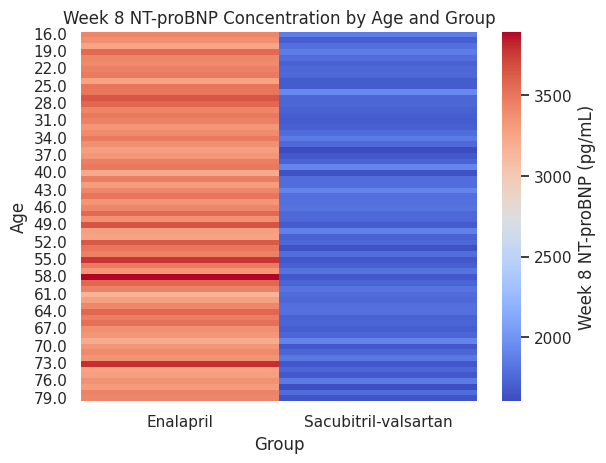

In [52]:
sns.heatmap(df_matrix, annot=False, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Week 8 NT-proBNP (pg/mL)'})
plt.title('Week 8 NT-proBNP Concentration by Age and Group')
sns.set_context('poster'),
plt.savefig('heatmap.pdf', bbox_inches='tight')

## **Statistical analysis (20 points)**

**Explore the safety of sacubitril/valsartan and enalapril in this stabilized acute heart failure patient population**

Please provide the following statistical measures for various characteristics, including BMI, and group the results by the intervention type (sacubitril/valsartan and enalapril):

**For Sacubitril/Valsartan Intervention:**

Mean and standard deviation (std) for each characteristic, including BMI.
Median for each characteristic, including BMI.

**For Enalapril Intervention:**

Mean and standard deviation (std) for each characteristic, including BMI.
Median for each characteristic, including BMI.  (4 points)

In [53]:
df_group_a = df_inclusion[df_inclusion['Group'].str.startswith('Enalapril')].select_dtypes(['number'])
df_stat_a = pd.concat([df_group_a.mean(),df_group_a.median(),df_group_a.std()],axis=1,names = ['mean','median','standard deviation'],ignore_index=True)

from tabulate import tabulate
print("For Enalapril Intervention:")
print(
    tabulate(
        df_stat_a,
        headers=['mean','median','standard deviation'],
        floatfmt=".5f",
        showindex=True,
        tablefmt="fancy_grid"
    )
)

df_group_b = df_inclusion[df_inclusion['Group'].str.startswith('Sacubitril-valsartan')].select_dtypes(['number'])
df_stat_b = pd.concat([df_group_b.mean(),df_group_b.median(),df_group_b.std()],axis=1,names = ['mean','median','standard deviation'],ignore_index=True)

from tabulate import tabulate
print("For Sacubitril/Valsartan Intervention:")
print(
    tabulate(
        df_stat_b,
        headers=['mean','median','standard deviation'],
        floatfmt=".5f",
        showindex=True,
        tablefmt="fancy_grid"
    )
)


For Enalapril Intervention:
╒════════════════════════════════════════╤════════════╤════════════╤══════════════════════╕
│                                        │       mean │     median │   standard deviation │
╞════════════════════════════════════════╪════════════╪════════════╪══════════════════════╡
│ Age                                    │   47.46729 │   46.00000 │             18.12877 │
├────────────────────────────────────────┼────────────┼────────────┼──────────────────────┤
│ Height (cm)                            │  180.96963 │  180.00000 │             17.91344 │
├────────────────────────────────────────┼────────────┼────────────┼──────────────────────┤
│ Weight (kg)                            │   79.67523 │   79.00000 │             23.80738 │
├────────────────────────────────────────┼────────────┼────────────┼──────────────────────┤
│ Pre-treatment NT-proBNP (pg/mL)        │ 6152.30168 │ 6050.97100 │            713.60939 │
├────────────────────────────────────────┼──────────

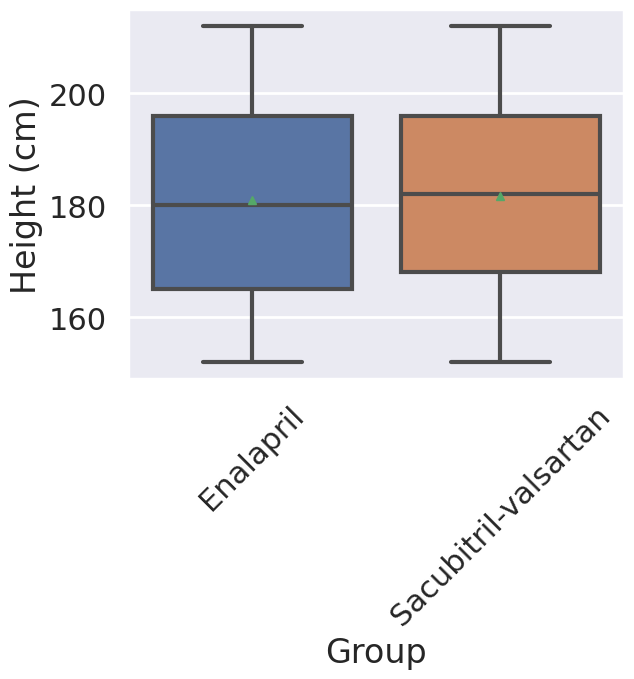

In [54]:
# @title
sns.boxplot(data=df_cleaned, x = 'Group', y = 'Height (cm)', showmeans=True)

plt.xticks(rotation=45)
plt.show()

What statistical test should be employed to analyze the effectiveness of the new heart failure medication formulations developed by two pharmaceutical companies, sacubitril and enalapril, with respect to their claims of reducing NT-proBNP levels? The claims state that sacubitril reduces NT-proBNP levels by an average of 3000 within 4 weeks and 2000 within 8 weeks, while enalapril reduces NT-proBNP levels by an average of 2500 within 4 weeks and 1500 within 8 weeks. A clinical trial was conducted using samples from both companies, and the objective is to determine which formulation is more effective.

Clearly state your hypotheses for the combinations of analyses and do the significance test accordingly:

1. For the sacubitril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels? (2 Points)

2. For the sacubitril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels? (2 Points)

3. For the enalapril group, is there a significant difference between pre-treatment and Week 4 NT-proBNP levels? (2 Points)

4. For the enalapril group, is there a significant difference between pre-treatment and Week 8 NT-proBNP levels? (2 Points)

5. Is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)? (2 Points)

6. Is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)? (2 Points)

7. Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril)? (2 Points)

8. Among participants aged 60 or older, is there a significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril)? (2 Points)
   

**Hypothesis 1:**

H0: There is no statistical significant difference between pre-treatment and Week 4 NT-proBNP levels for the sacubitril group

H1: There is a statistical significant difference between pre-treatment and Week 4 NT-proBNP levels for the sacubitril group

In [55]:
h1df = df_inclusion.loc[df_inclusion['Group']=='Sacubitril-valsartan'][['Pre-treatment NT-proBNP (pg/mL)', 'Week 4 NT-proBNP (pg/mL)']]. copy()
h1df

,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL)
500,6339.815,3379.121
501,5918.269,3154.437
502,6159.078,3282.789
503,5420.299,2889.019
504,5594.383,2981.806
...,...,...
994,5618.077,2994.435
995,5827.914,3106.278
996,6904.870,3680.296
997,5827.777,3106.205


In [56]:
stats.ttest_rel(h1df['Pre-treatment NT-proBNP (pg/mL)'],h1df['Week 4 NT-proBNP (pg/mL)'])

TtestResult(statistic=190.79318546519417, pvalue=0.0, df=436)

In [57]:
stats.wilcoxon(h1df['Pre-treatment NT-proBNP (pg/mL)'],h1df['Week 4 NT-proBNP (pg/mL)'])

WilcoxonResult(statistic=0.0, pvalue=2.4618505255431396e-73)

<font color='red'>Since the p value is less then 0.05, the null hypothesis is rejected and the alternative hypothesis is accepted. Therefore, there is a statistical significant difference between the pre-treatment and Week 4 NT-proBNP levels for the sacubitril group.</font>

**Hypothesis 2:**

H0: There is no statistical significant difference between pre-treatment and Week 8 NT-proBNP levels for the sacubitril group

H1: There is a statistical significant difference between pre-treatment and Week 8 NT-proBNP levels for the sacubitril group

In [58]:
h2df = df_inclusion.loc[df_inclusion['Group']=='Sacubitril-valsartan'][['Pre-treatment NT-proBNP (pg/mL)', 'Week 8 NT-proBNP (pg/mL)']]. copy()
h2df

,Pre-treatment NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL)
500,6339.815,1801.071
501,5918.269,1681.315
502,6159.078,1749.727
503,5420.299,1539.847
504,5594.383,1589.303
...,...,...
994,5618.077,1596.034
995,5827.914,1655.646
996,6904.870,1961.598
997,5827.777,1655.607


In [59]:
stats.ttest_rel(h2df['Pre-treatment NT-proBNP (pg/mL)'],h2df['Week 8 NT-proBNP (pg/mL)'])

TtestResult(statistic=190.79317688428938, pvalue=0.0, df=436)

In [60]:
stats.wilcoxon(h2df['Pre-treatment NT-proBNP (pg/mL)'],h2df['Week 8 NT-proBNP (pg/mL)'])

WilcoxonResult(statistic=0.0, pvalue=2.4618505255431396e-73)

<font color='red'>Since the p value is less then 0.05, the null hypothesis is rejected and the alternative hypothesis is accepted. Therefore, there is a statistical significant difference between the pre-treatment and Week 8 NT-proBNP levels for the sacubitril group.</font>

**Hypothesis 3:**

H0: There is no statistical significant difference between pre-treatment and Week 4 NT-proBNP levels for the enalapril group

H1: There is a statistical significant difference between pre-treatment and Week 4 NT-proBNP levels For the enalapril group

In [61]:
h3df = df_inclusion.loc[df_inclusion['Group']=='Enalapril'][['Pre-treatment NT-proBNP (pg/mL)', 'Week 4 NT-proBNP (pg/mL)']]. copy()
h3df

,Pre-treatment NT-proBNP (pg/mL),Week 4 NT-proBNP (pg/mL)
0,6121.516,4572.772
2,6907.303,5159.755
3,7303.676,5455.846
4,6569.322,4907.284
6,5851.432,4371.020
...,...,...
495,5818.298,4346.269
496,6357.539,4749.082
497,6877.146,5137.228
498,6584.692,4918.765


In [62]:
stats.ttest_rel(h3df['Pre-treatment NT-proBNP (pg/mL)'],h3df['Week 4 NT-proBNP (pg/mL)'])

TtestResult(statistic=178.36060632521136, pvalue=0.0, df=427)

In [63]:
stats.wilcoxon(h3df['Pre-treatment NT-proBNP (pg/mL)'],h3df['Week 4 NT-proBNP (pg/mL)'])

WilcoxonResult(statistic=0.0, pvalue=7.269319516344141e-72)

<font color='red'>Since the p value is less then 0.05, the null hypothesis is rejected and the alternative hypothesis is accepted. Therefore, there is a statistical significant difference between the pre-treatment and Week 4 NT-proBNP levels for the enalapril group.</font>

**Hypothesis 4:**

H0: There is no statistical significant difference between pre-treatment and Week 8 NT-proBNP levels for the enalapril group

H1: There is a statistical significant difference between pre-treatment and Week 8 NT-proBNP levels For the enalapril group

In [64]:
h4df = df_inclusion.loc[df_inclusion['Group']=='Enalapril'][['Pre-treatment NT-proBNP (pg/mL)', 'Week 8 NT-proBNP (pg/mL)']]. copy()
h4df

,Pre-treatment NT-proBNP (pg/mL),Week 8 NT-proBNP (pg/mL)
0,6121.516,3415.861
2,6907.303,3854.337
3,7303.676,4075.517
4,6569.322,3665.741
6,5851.432,3265.152
...,...,...
495,5818.298,3246.663
496,6357.539,3547.564
497,6877.146,3837.509
498,6584.692,3674.317


In [65]:
stats.ttest_rel(h4df['Pre-treatment NT-proBNP (pg/mL)'],h4df['Week 8 NT-proBNP (pg/mL)'])

TtestResult(statistic=178.3606194054934, pvalue=0.0, df=427)

In [66]:
stats.wilcoxon(h4df['Pre-treatment NT-proBNP (pg/mL)'],h4df['Week 8 NT-proBNP (pg/mL)'])

WilcoxonResult(statistic=0.0, pvalue=7.269319516344141e-72)

<font color='red'>Since the p value is less then 0.05, the null hypothesis is rejected and the alternative hypothesis is accepted. Therefore, there is a statistical significant difference between the pre-treatment and Week  NT-proBNP levels for the enalapril group.</font>

**Hypothesis 5:**

H0: There is no statistical significant difference in NT-proBNP levels at Week 4 between the enalapril and sacubitril groups

H1: There is a statistical significant difference in NT-proBNP levels at Week 4 between the enalapril and sacubitril groups

In [67]:
from scipy.stats import ttest_ind

# Assuming h1df is your DataFrame
enalapril_group1 = df_inclusion[df_inclusion['Group'] == 'Enalapril']['Week 4 NT-proBNP (pg/mL)']
sacubitril_group1 = df_inclusion[df_inclusion['Group'] == 'Sacubitril-valsartan']['Week 4 NT-proBNP (pg/mL)']

# Perform independent samples t-test
result = ttest_ind(enalapril_group1, sacubitril_group1, equal_var=False)

# Extract the p-value from the result
p_value = result.pvalue

# Round the p-value to the third digit
rounded_p_value = round(p_value, 3)

# Print the rounded p-value
print("Rounded p-value:", rounded_p_value)


Rounded p-value: 0.0


<font color='red'>Since the p value is less then 0.05, the null hypothesis is rejected and the alternative hypothesis is accepted. Therefore, there is a statistical significant difference between the NT-proBNP levels at Week 4 between the enalapril and sacubitril groups

**Hypothesis 6:**

H0: There is no statistical significant difference in NT-proBNP levels at Week 8 between the enalapril and sacubitril groups

H1: There is a statistical significant difference in NT-proBNP levels at Week 8 between the enalapril and sacubitril groups

In [68]:
from scipy.stats import ttest_ind

# Assuming h1df is your DataFrame
enalapril_group2 = df_inclusion[df_inclusion['Group'] == 'Enalapril']['Week 8 NT-proBNP (pg/mL)']
sacubitril_group2 = df_inclusion[df_inclusion['Group'] == 'Sacubitril-valsartan']['Week 8 NT-proBNP (pg/mL)']

# Perform independent samples t-test
result = ttest_ind(enalapril_group2, sacubitril_group2, equal_var=False)

# Extract the p-value from the result
p_value = result.pvalue

# Round the p-value to the third digit
rounded_p_value = round(p_value, 3)

# Print the rounded p-value
print("Rounded p-value:", rounded_p_value)


Rounded p-value: 0.0


<font color='red'>Since the p value is less then 0.05, the null hypothesis is rejected and the alternative hypothesis is accepted. Therefore, there is a statistical significant difference between the NT-proBNP levels at Week 8 between the enalapril and sacubitril groups

**Hypothesis 7:**

H0: There is no statistical significant in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril) at ages >= 60

H1: There is a statistical significant in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril) at ages >= 60

In [69]:
from scipy.stats import ttest_ind

# Assuming h1df is your DataFrame
# Filter data for participants aged 60 or older
older_participants = df_inclusion[df_inclusion['Age'] >= 60]

# Separate data into sacubitril and enalapril groups
sacubitril_group3 = older_participants[older_participants['Group'] == 'Sacubitril-valsartan']['Week 4 NT-proBNP (pg/mL)']
enalapril_group3 = older_participants[older_participants['Group'] == 'Enalapril']['Week 4 NT-proBNP (pg/mL)']

# Perform independent samples t-test
result = ttest_ind(sacubitril_group3, enalapril_group3, equal_var=False)

# Extract the p-value from the result
p_value = result.pvalue

# Round the p-value to the third digit
rounded_p_value = round(p_value, 3)

# Print the rounded p-value
print("Rounded p-value:", rounded_p_value)

Rounded p-value: 0.0


<font color='red'>Since the p value is less then 0.05, the null hypothesis is rejected and the alternative hypothesis is accepted. Therefore, there is a statistical significant difference in NT-proBNP levels at Week 4 between the two groups (sacubitril and enalapril) at ages >= 60

**Hypothesis 7:**

H0: There is no statistical significant in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril) at ages >= 60

H1: There is a statistical significant in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril) at ages >= 60

In [70]:
from scipy.stats import ttest_ind

# Assuming h1df is your DataFrame
# Filter data for participants aged 60 or older
older_participants = df_inclusion[df_inclusion['Age'] >= 60]

# Separate data into sacubitril and enalapril groups
sacubitril_group4 = older_participants[older_participants['Group'] == 'Sacubitril-valsartan']['Week 4 NT-proBNP (pg/mL)']
enalapril_group4 = older_participants[older_participants['Group'] == 'Enalapril']['Week 4 NT-proBNP (pg/mL)']

# Perform independent samples t-test
result = ttest_ind(sacubitril_group4, enalapril_group4, equal_var=False)

# Extract the p-value from the result
p_value = result.pvalue

# Round the p-value to the third digit
rounded_p_value = round(p_value, 3)

# Print the rounded p-value
print("Rounded p-value:", rounded_p_value)

Rounded p-value: 0.0


<font color='red'>Since the p value is less then 0.05, the null hypothesis is rejected and the alternative hypothesis is accepted. Therefore, there is a statistical significant difference in NT-proBNP levels at Week 8 between the two groups (sacubitril and enalapril) at ages >= 60

Is there a statistically significant difference between the pre-treatment NT-proBNP and week 4 NT-proBNP, and between baseline and week 8 NT-proBNP in sacubitril/valsartan and enalapril groups? (2 points)

_**Yes, there is a statistical significant difference between the pre-treatment NT-proBNP and week 4 NT-proBNP (proven by Hypothesis 1 to 4**_

_**Yes, there is a statistical significant difference between baseline and week 8 NT-proBNP in sacubitril/valsartan and enalapril groups (proven by Hypothesis 5 to 8)**_